# Stationarity Analysis
## 1. Exploratory Data Analysis and Diagnostics (15 pts)

Perform EDA including summary statistics, trend inspection, rolling mean and variance, correlation analysis, and missing data assessment.

Discuss at least one limitation of EDA for determining stationarity.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.grid"] = True



In [3]:
df=pd.read_csv('D:\download\hw1_data.csv')
df['Date']=pd.to_datetime(df['Date'])
df

,Date,IWM,QQQ,SPY
0,2000-05-26,34.800865,67.670738,93.363678
1,2000-05-30,36.085365,74.470436,96.408173
2,2000-05-31,36.216213,72.348938,96.619591
3,2000-06-01,37.036850,76.048004,98.310966
4,2000-06-02,38.963646,81.487755,100.023491
...,...,...,...,...
4967,2020-02-26,152.328430,215.254486,305.789459
4968,2020-02-27,146.964890,204.475845,292.055939
4969,2020-02-28,144.273254,204.634949,290.828827
4970,2020-03-02,148.907211,215.194824,303.423584


In [ ]:
num_df=df.copy()
num_df=num_df.set_index('Date')

# Summary statistics
display(num_df.describe())

# Missingness
missing_counts = num_df.isna().sum().sort_values(ascending=False)
missing_rate = (missing_counts / len(num_df)).sort_values(ascending=False)
missing_summary = pd.DataFrame({"missing_count": missing_counts, "missing_rate": missing_rate})
display(missing_summary)

,IWM,QQQ,SPY
count,4972.000000,4972.000000,4972.000000
mean,77.254619,70.539066,134.360431
std,38.722995,49.057235,66.778492
min,25.456144,17.459492,53.503864
25%,46.092833,34.344567,85.923027
50%,63.785954,48.595505,105.741215
75%,106.390139,99.085045,180.474552
max,167.320114,235.638428,332.137360


,missing_count,missing_rate
IWM,0,0.0
QQQ,0,0.0
SPY,0,0.0


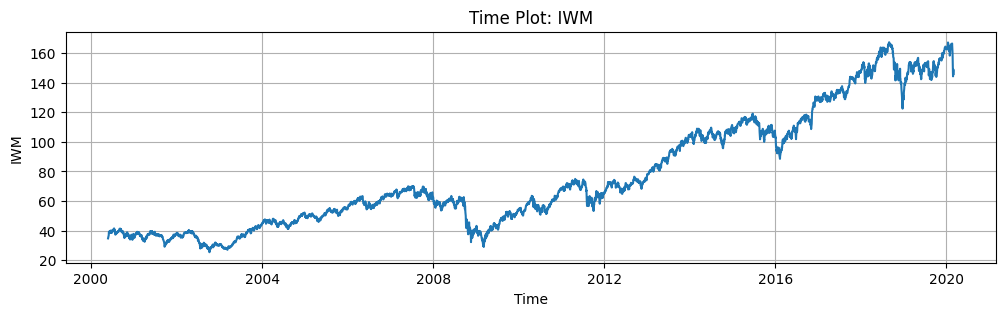

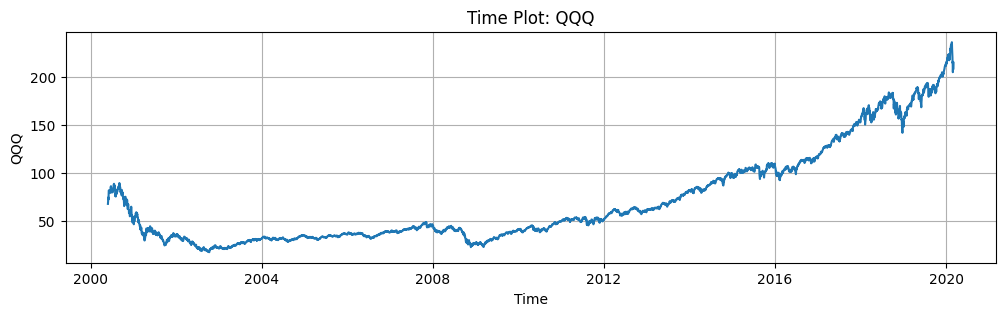

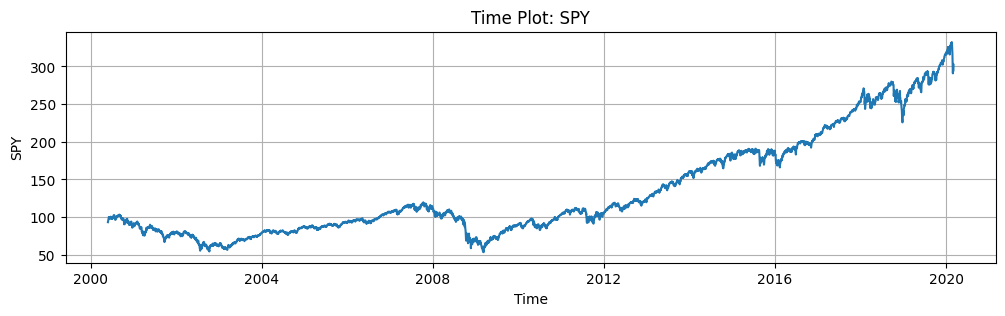

In [ ]:
# Trend inspection
for col in num_df.columns:
    s = num_df[col]
    plt.figure(figsize=(12, 3))
    plt.plot(s.index, s.values)
    plt.title(f"Time Plot: {col}")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.show()

### Trend inspection
The time series plots of IWM, QQQ, and SPY all show strong upward trends from 2000 to 2020, with noticeable drawdowns around major market events such as the 2008 financial crisis and the 2020 COVID crash.
* SPY displays a smooth long-term upward trajectory with periodic drawdowns.
* QQQ exhibits the strongest growth trend, particularly after 2010, consistent with technology-sector dominance.
* IWM also trends upward but with visibly larger fluctuations relative to its level, indicating higher volatility.

None of the three series fluctuate around a constant mean; instead, their levels drift upward over time. This visually contradicts the assumption of stationarity.

Rolling window = 30


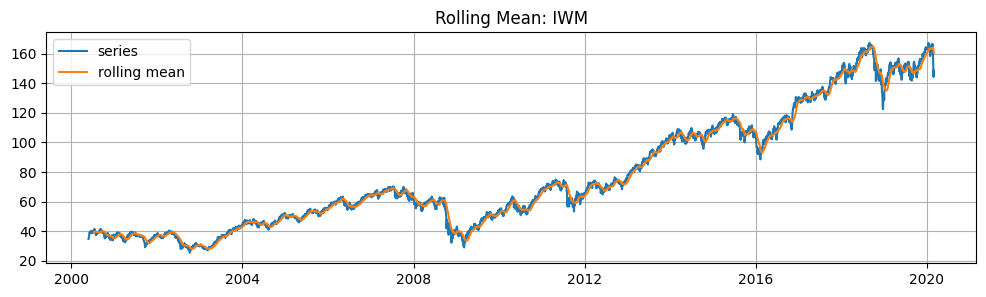

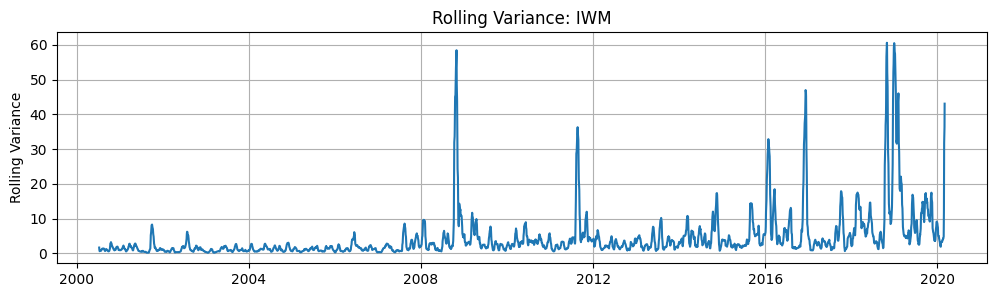

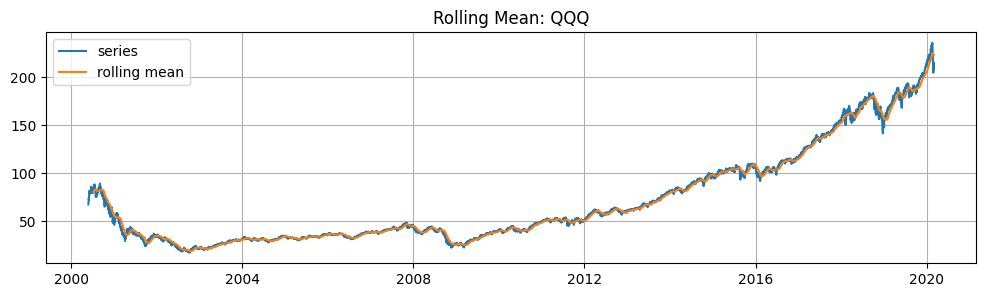

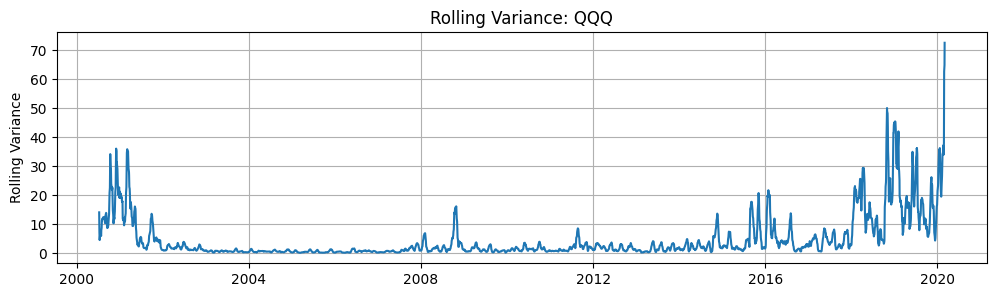

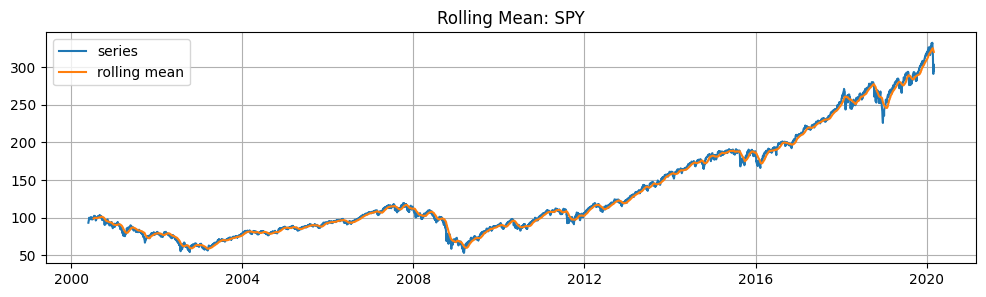

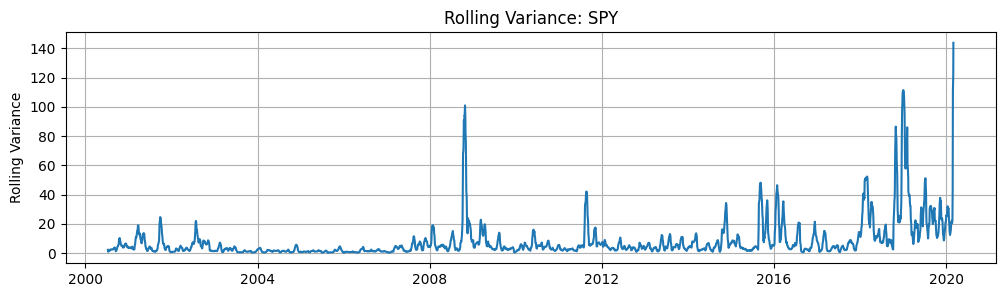

In [ ]:
# Rolling mean & rolling variance
window = 30
print("Rolling window =", window)

for col in num_df.columns:
    s = num_df[col].dropna()
    roll_mean = s.rolling(window=window).mean()
    roll_var = s.rolling(window=window).var()

    plt.figure(figsize=(12, 3))
    plt.plot(s.index, s.values, label="series")
    plt.plot(roll_mean.index, roll_mean.values, label="rolling mean")
    plt.title(f"Rolling Mean: {col}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 3))
    plt.plot(roll_var.index, roll_var.values)
    plt.title(f"Rolling Variance: {col}")
    plt.ylabel("Rolling Variance")
    plt.show()


### Rolling mean & rolling variance
The rolling means for all three series closely track their respective price levels and clearly change over time:
* For IWM, the rolling mean rises from around 40 in the early 2000s to above 140 by 2020.
* For QQQ, the rolling mean increases from below 50 to above 200.
* For SPY, the rolling mean grows from roughly 100 to over 300.
Because the rolling mean is not constant but instead exhibits a persistent upward drift, this provides strong evidence that all three series are non-stationary in mean.

The rolling variance plots show that volatility is not constant over time:
All three series display volatility spikes around major crises (2008 and 2020).
This behavior indicates heteroskedasticity (time-varying variance), which violates the assumption of second-order stationarity.

,IWM,QQQ,SPY
IWM,1.000000,0.950877,0.982987
QQQ,0.950877,1.000000,0.986423
SPY,0.982987,0.986423,1.000000


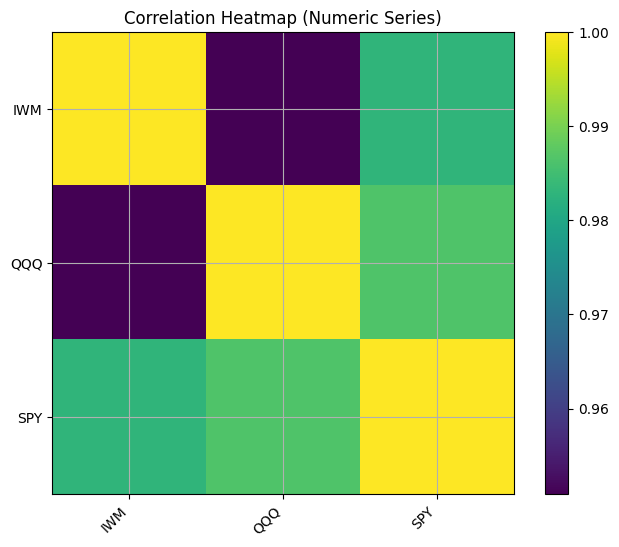

In [ ]:
# Correlation analysis
corr = num_df.corr()
display(corr)

plt.figure(figsize=(8, 6))
plt.imshow(corr.values)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.title("Correlation Heatmap (Numeric Series)")
plt.show()

### Correlation analysis
The correlation matrix shows extremely high correlations.
These near-unit correlations suggest that all three ETFs are driven by a common market factor. However, since the series are trending, these correlations may be spurious, reflecting shared non-stationary trends rather than true long-run equilibrium relationships.


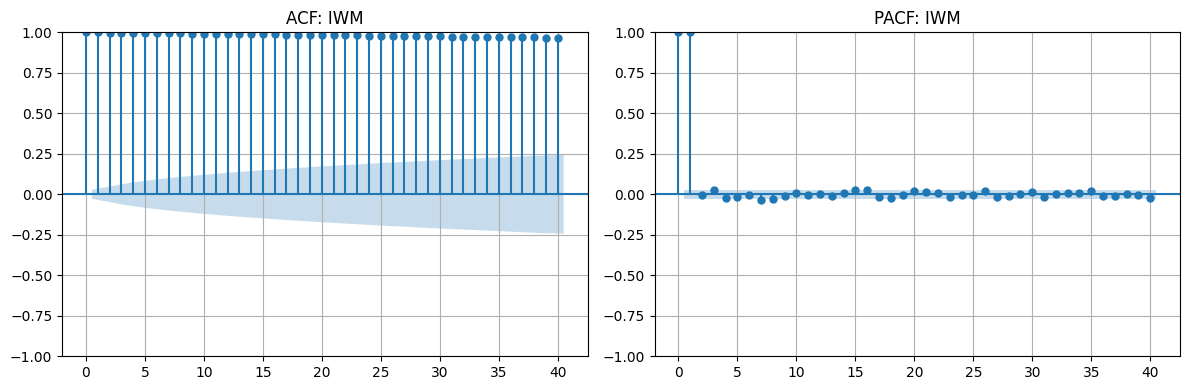

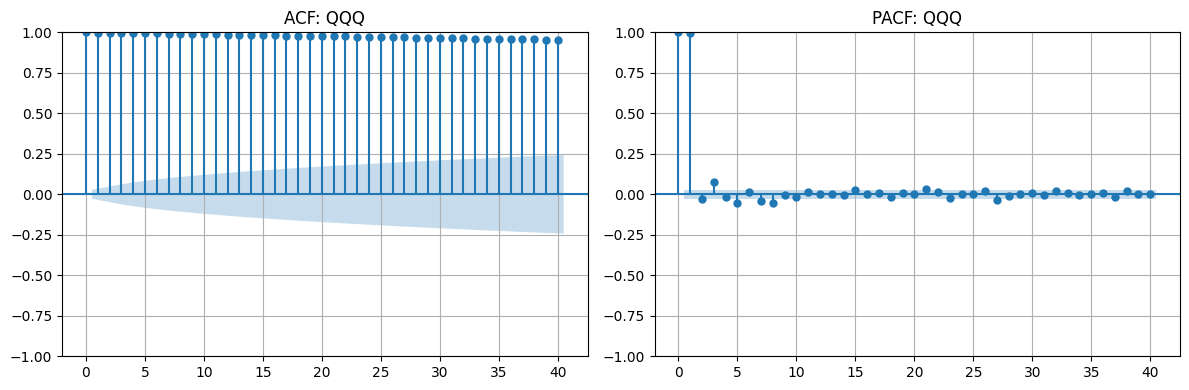

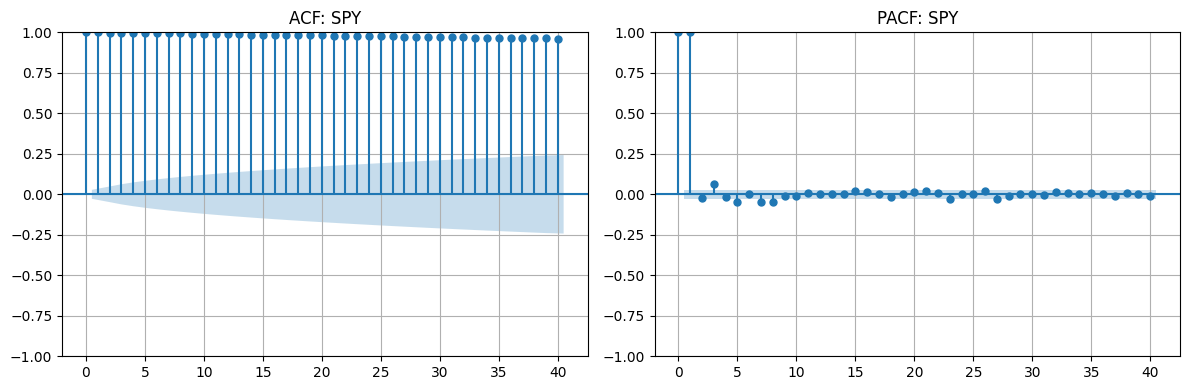

In [ ]:
# ACF / PACF
lags = min(40, len(num_df)//4)

for col in num_df.columns:
    s = num_df[col].dropna()
    if len(s) < 10:
        continue

    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    plot_acf(s, lags=lags, ax=ax1)
    ax1.set_title(f"ACF: {col}")

    ax2 = fig.add_subplot(1, 2, 2)
    plot_pacf(s, lags=lags, ax=ax2, method="ywm")
    ax2.set_title(f"PACF: {col}")

    plt.tight_layout()
    plt.show()


## ACF & PACF
The ACF plots for IWM, QQQ, and SPY show extremely slow decay: autocorrelations remain close to 1 even at long lags (40 periods). This is a classic signature of a unit root process.

The PACF plots show:
* A very large spike at lag 1
* Near-zero values at all higher lags

This pattern is consistent with a random walk, where each value is dominated by its immediate past value plus a new shock.

## Limitation of EDA for Stationarity
While visual diagnostics strongly suggest non-stationarity, EDA alone cannot formally distinguish between a unit-root process (stochastic trend), and a trend-stationary process (deterministic trend around which the series fluctuates).

Rolling statistics and plots are also sensitive to the choice of window size and sample length. Therefore, formal statistical tests such as ADF and KPSS are required to determine whether shocks have permanent effects (unit root) or temporary effects (stationarity).


## 2. Conceptual Description and Hypothesis Formation (10 pts)


Now this is directly based on what we just saw.


IWM
* IWM shows a persistent upward trend, non-constant rolling mean, volatility clustering, and an ACF that remains near 1. This suggests IWM behaves like a random walk with drift rather than a stationary process.

QQQ
* QQQ exhibits the strongest trend, especially after 2010, with highly persistent shocks and increasing variance. Its ACF and rolling mean strongly suggest unit-root non-stationarity.

SPY
* SPY also trends upward with high persistence and time-varying volatility. The ACF pattern is consistent with a random walk.

### Testable hypotheses
From EDA, we expect non-stationarity.
#### ADF Test
H1: Series has a unit root (non-stationary)
H0: Series is stationary
#### KPSS  Test
H1:Series is stationary
H0:Series is non-stationary

Because the plots show drifting means and persistent shocks, we expect:
* ADF fails to reject the unit root
* KPSS rejects stationarity

If prices follow a random walk, shocks have permanent effects and prices never revert.
If prices are trend-stationary, shocks fade and the series returns to a trend.

## 3. Stationarity Testing Framework (15 pts)
Create a reusable function that performs ADF and KPSS tests and returns test statistics, p-values, and conclusions at alpha = 0.05.

Present results in a structured summary table.

### ADF Test Function

In [ ]:
# ADF test function

import pandas as pd
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

alpha=0.05
regression='c'

def perform_adf_test(series, series_name):
    """
    Perform ADF test and return results.

    Parameters:
    - series: time series data
    - series_name: name for display
    - regression: 'c' (constant), 'ct' (constant+trend), 'n' (none)
    - alpha: significance level (default 0.05)
    """
    series_clean = pd.Series(series).dropna()
    adf_result = adfuller(series_clean, regression=regression, autolag='AIC')

    adf_stat = adf_result[0]
    p_value = adf_result[1]
    n_lags = adf_result[2]
    n_obs = adf_result[3]
    critical_values = adf_result[4]

    conclusion = "Reject H0 - Stationary" if p_value < alpha else "Fail to Reject H0 - Non-Stationary"

    return {
        'Series': series_name,
        'ADF Statistic': adf_stat,
        'P-Value': p_value,
        'Lags': n_lags, # determined by AIC
        'N Obs': n_obs,
        #'CV 1%': critical_values['1%'],
        #'CV 5%': critical_values['5%'],
        #'CV 10%': critical_values['10%'],
        'Conclusion': conclusion
    }

def print_adf_summary(results_list):
    """Print formatted table from list of ADF results."""
    df_results = pd.DataFrame(results_list)
    print("\n" + "="*120)
    print("ADF TEST RESULTS SUMMARY (α = 0.05)")
    print("="*120)
    print(tabulate(df_results, headers='keys', tablefmt='grid', showindex=False, floatfmt='.4f'))
    print("\nH0: Series has unit root (non-stationary) | H1: Series is stationary")
    print("="*120 + "\n")

### KPSS Test Function

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import kpss
from tabulate import tabulate

alpha=0.05
nlags='auto'

def perform_kpss_test(series, series_name, regression):
    """
    Perform KPSS test and return results.

    Parameters:
    - series: time series data
    - series_name: name for display
    - regression: 'c' (level stationary), 'ct' (trend stationary)
    - alpha: significance level (default 0.05)
    - nlags: number of lags ('auto' or integer)
    """
    series_clean = pd.Series(series).dropna()
    kpss_result = kpss(series_clean, regression=regression, nlags=nlags)

    kpss_stat = kpss_result[0]
    p_value = kpss_result[1]
    n_lags = kpss_result[2]
    critical_values = kpss_result[3]

    conclusion = "Reject H0 - Non-Stationary" if p_value < alpha else "Fail to Reject H0 - Stationary"

    return {
        'Series': series_name,
        'KPSS Statistic': kpss_stat,
        'P-Value': p_value,
        'Lags': n_lags,
        #'CV 1%': critical_values['1%'],
        #'CV 2.5%': critical_values['2.5%'],
        #'CV 5%': critical_values['5%'],
        #'CV 10%': critical_values['10%'],
        'Conclusion': conclusion
    }

def print_kpss_summary(results_list):
    """Print formatted table from list of KPSS results."""
    df_results = pd.DataFrame(results_list)
    print("\n" + "="*120)
    print("KPSS TEST RESULTS SUMMARY (α = 0.05)")
    print("="*120)
    print(tabulate(df_results, headers='keys', tablefmt='grid', showindex=False, floatfmt='.4f'))
    print("\nH0: Series is stationary | H1: Series has unit root (non-stationary)")
    print("="*120 + "\n")

## 4. Conflicting Test Results and Interpretation (10 pts)
Apply the testing framework to all series.

If results conflict, explain why, evaluate which is more appropriate, and justify using statistical theory.



### Running ADF Test

In [ ]:
# Test your data
results = []

# Price levels
results.append(perform_adf_test(num_df['IWM'], 'IWM Price'))
results.append(perform_adf_test(num_df['QQQ'], 'QQQ Price'))
results.append(perform_adf_test(num_df['SPY'], 'SPY Price'))


# Print table
print_adf_summary(results)


ADF TEST RESULTS SUMMARY (α = 0.05)
+-----------+-----------------+-----------+--------+---------+------------------------------------+
| Series    |   ADF Statistic |   P-Value |   Lags |   N Obs | Conclusion                         |
+===========+=================+===========+========+=========+====================================+
| IWM Price |         -0.1481 |    0.9444 |     17 |    4954 | Fail to Reject H0 - Non-Stationary |
+-----------+-----------------+-----------+--------+---------+------------------------------------+
| QQQ Price |          2.5260 |    0.9991 |     31 |    4940 | Fail to Reject H0 - Non-Stationary |
+-----------+-----------------+-----------+--------+---------+------------------------------------+
| SPY Price |          1.5752 |    0.9978 |     17 |    4954 | Fail to Reject H0 - Non-Stationary |
+-----------+-----------------+-----------+--------+---------+------------------------------------+

H0: Series has unit root (non-stationary) | H1: Series is stat

### Running KPSS Test

In [ ]:
# Test your data
results = []

# Price levels (test for level stationarity)
results.append(perform_kpss_test(num_df['IWM'], 'IWM Price', regression='c'))
results.append(perform_kpss_test(num_df['QQQ'], 'QQQ Price', regression='c'))
results.append(perform_kpss_test(num_df['SPY'], 'SPY Price', regression='c'))

# Print table
print_kpss_summary(results)


KPSS TEST RESULTS SUMMARY (α = 0.05)
+-----------+------------------+-----------+--------+----------------------------+
| Series    |   KPSS Statistic |   P-Value |   Lags | Conclusion                 |
+===========+==================+===========+========+============================+
| IWM Price |          10.1320 |    0.0100 |     42 | Reject H0 - Non-Stationary |
+-----------+------------------+-----------+--------+----------------------------+
| QQQ Price |           8.7676 |    0.0100 |     42 | Reject H0 - Non-Stationary |
+-----------+------------------+-----------+--------+----------------------------+
| SPY Price |           9.3495 |    0.0100 |     42 | Reject H0 - Non-Stationary |
+-----------+------------------+-----------+--------+----------------------------+

H0: Series is stationary | H1: Series has unit root (non-stationary)



/tmp/ipython-input-4234137206.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series_clean, regression=regression, nlags=nlags)
/tmp/ipython-input-4234137206.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series_clean, regression=regression, nlags=nlags)
/tmp/ipython-input-4234137206.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series_clean, regression=regression, nlags=nlags)


### Comparing ADF and KPSS test results

When looking at the output of both the ADF and KPSS test results, both tests determine that all of the time series are non stationary.

# Part II — Random Walk Simulation and Analysis (50 pts)

## 5. Random Walk Construction (10 pts)
Generate a ±1 innovation sequence of length 1000 using random.sample.

Construct the cumulative sum series and distinguish innovation from process.



In [ ]:
# Check with Leo's code
import random
import itertools

# constructing innovation and process without replacement
n = 1000

# Reproducibility
random.seed(42)
np.random.seed(42)

innovations = random.choices([-1, 1], k=n)

rw = list(itertools.accumulate(innovations))



for t in range(10):

    print(f"{t+1:9} | {innovations[t]:17} | {rw[t]}")

        1 |                 1 | 1
        2 |                -1 | 0
        3 |                -1 | -1
        4 |                -1 | -2
        5 |                 1 | -1
        6 |                 1 | 0
        7 |                 1 | 1
        8 |                -1 | 0
        9 |                -1 | -1
       10 |                -1 | -2


In [ ]:
'''


# Generate ±1 innovation sequence of length 1000
innovations = random.sample([-1, 1] * 500, 1000)

print(f"Innovation Sequence Length: {len(innovations)}")
print(f"First 20 values: {innovations[:20]}")
print(f"Count of +1: {innovations.count(1)}")
print(f"Count of -1: {innovations.count(-1)}")
print(f"Sum: {sum(innovations)}")
'''

'\n\n\n# Generate ±1 innovation sequence of length 1000\ninnovations = random.sample([-1, 1] * 500, 1000)\n\nprint(f"Innovation Sequence Length: {len(innovations)}")\nprint(f"First 20 values: {innovations[:20]}")\nprint(f"Count of +1: {innovations.count(1)}")\nprint(f"Count of -1: {innovations.count(-1)}")\nprint(f"Sum: {sum(innovations)}")\n'

In [ ]:
'''
# Construct cumulative sum series (the process)
rw = np.cumsum(innovation_sequence)
print(f"First 20 values: {rw[:20]}")
'''

'\n# Construct cumulative sum series (the process)\nrw = np.cumsum(innovation_sequence)\nprint(f"First 20 values: {rw[:20]}")\n'

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



n = 1000
innovations = np.array(innovations)

'''
# Might need to comment out 1) and 2)
# 1) Innovation sequence: ±1 using random.sample
innovations = random.sample([-1, 1] * (n//2) + ([-1] if n % 2 else []), n)


# 2) Random walk process: cumulative sum
rw = np.cumsum(innovations)
'''

rw_df = pd.DataFrame({
    "innovation": innovations,
    "random_walk": rw
})
rw_df

print(f"Count of +1: {np.sum(innovations == 1)}")
print(f"Count of -1: {np.sum(innovations == -1)}")


Count of +1: 520
Count of -1: 480


### Distinguishing innovation from process
Random Walk Construction

A random walk can be expressed as: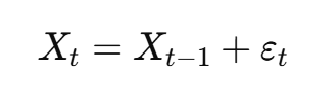

where εt is the innovation term and Xt is the process.

Innovation sequence: I generated a length-1000 sequence taking values
±1. These innovations are the new information arriving each period. They are designed to be independent across time with mean approximately zero.

Process 𝑋t: I constructed the random walk as the cumulative sum of innovations. This highlights the key distinction: while innovations are short-lived shocks at each time step, the random walk is an accumulated outcome of all past shocks.

## 6. Visualization and Autocorrelation Diagnostics (15 pts)
Create time series and autocorrelation plots.

Interpret lag behavior in relation to the data-generating process.

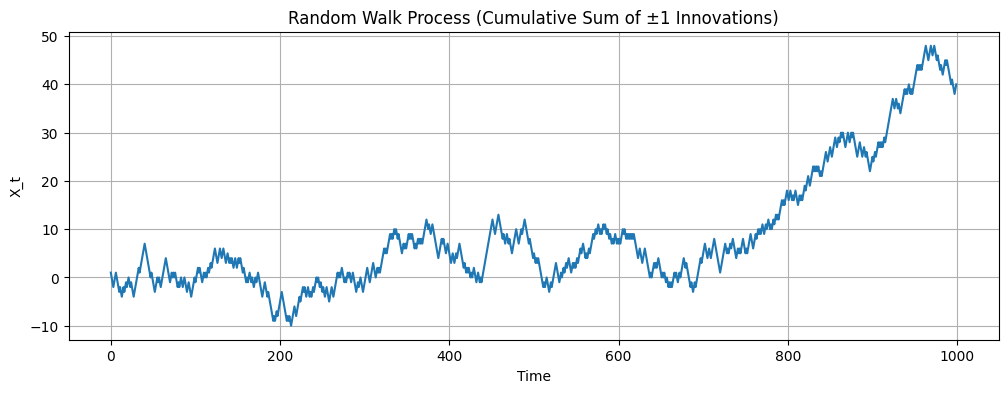

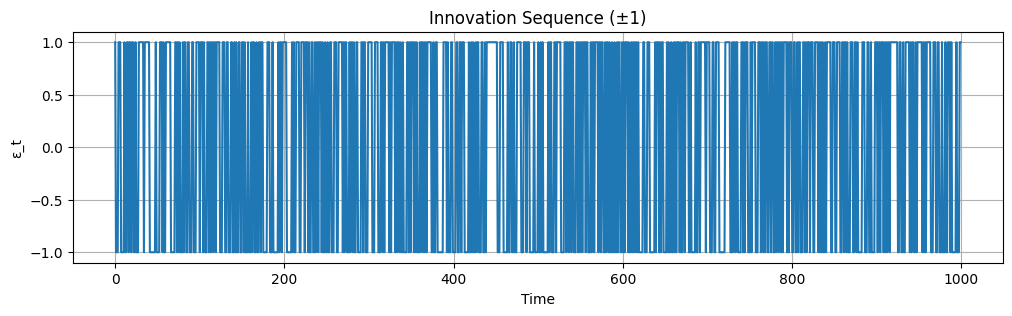

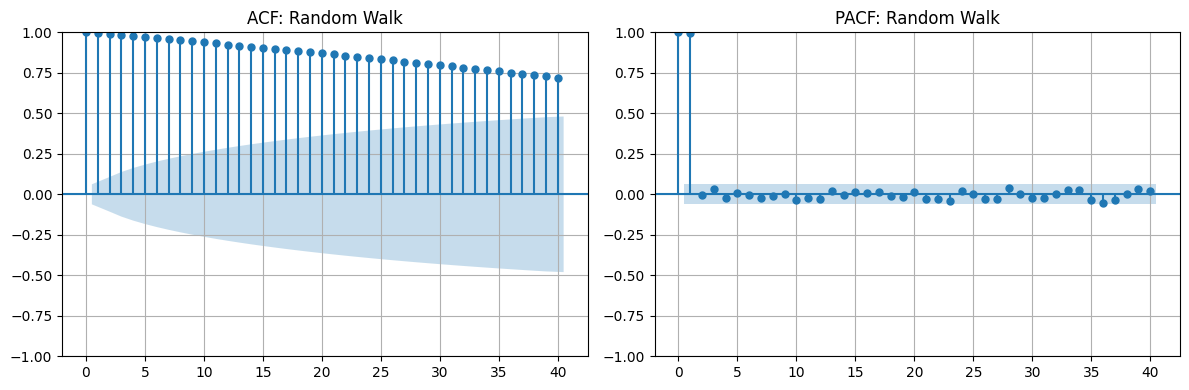

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time series plot
plt.figure(figsize=(12,4))
plt.plot(rw_df.index, rw_df["random_walk"])
plt.title("Random Walk Process (Cumulative Sum of ±1 Innovations)")
plt.xlabel("Time")
plt.ylabel("X_t")
plt.show()

# Innovation plot (optional but helps interpretation)
plt.figure(figsize=(12,3))
plt.plot(rw_df.index, rw_df["innovation"])
plt.title("Innovation Sequence (±1)")
plt.xlabel("Time")
plt.ylabel("ε_t")
plt.show()

# ACF/PACF
lags = 40

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
plot_acf(rw_df["random_walk"], lags=lags, ax=ax1)
ax1.set_title("ACF: Random Walk")

ax2 = fig.add_subplot(1,2,2)
plot_pacf(rw_df["random_walk"], lags=lags, ax=ax2, method="ywm")
ax2.set_title("PACF: Random Walk")

plt.tight_layout()
plt.show()


The simulated random walk shows a drifting and wandering pattern rather than fluctuating around a fixed mean. This behavior comes from the cumulative sum structure, where each shock permanently changes the level of the series.

The innovation sequence only takes values plus one or minus one and looks random with no visible trend. This confirms that all long term movement in the random walk comes from the accumulation of these shocks.

The ACF of the random walk remains very high even at long lags and declines slowly. This indicates strong persistence and long memory in the level of the series. The PACF shows a large spike at lag one and values close to zero afterward, meaning that most dependence comes from the previous period.

These patterns are typical for a random walk and are consistent with a unit root process.

## 7. Statistical Evaluation of the Random Walk (15 pts)
Apply ADF and KPSS tests.

Explain results in terms of unit roots, memory, and variance behavior.

In [ ]:
# ADF on random walk
adf_results = [perform_adf_test(rw_df["random_walk"], "Simulated Random Walk (X_t)")]
print_adf_summary(adf_results)

# KPSS on random walk (level-stationary null: regression='c')
kpss_results = [perform_kpss_test(rw_df["random_walk"], "Simulated Random Walk (X_t)", regression='c')]
print_kpss_summary(kpss_results)



ADF TEST RESULTS SUMMARY (α = 0.05)
+-----------------------------+-----------------+-----------+--------+---------+------------------------------------+
| Series                      |   ADF Statistic |   P-Value |   Lags |   N Obs | Conclusion                         |
+=============================+=================+===========+========+=========+====================================+
| Simulated Random Walk (X_t) |         -0.0912 |    0.9503 |      0 |     999 | Fail to Reject H0 - Non-Stationary |
+-----------------------------+-----------------+-----------+--------+---------+------------------------------------+

H0: Series has unit root (non-stationary) | H1: Series is stationary


KPSS TEST RESULTS SUMMARY (α = 0.05)
+-----------------------------+------------------+-----------+--------+----------------------------+
| Series                      |   KPSS Statistic |   P-Value |   Lags | Conclusion                 |
+=============================+==================+===========+

/tmp/ipython-input-4234137206.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series_clean, regression=regression, nlags=nlags)


The ADF test fails to reject the null hypothesis of a unit root, which means the series is not stationary. This implies that the random walk has no fixed mean and shocks have permanent effects on the level.

The KPSS test rejects the null hypothesis of stationarity. This also indicates that the random walk is not stationary.

Both tests agree that the simulated random walk is non stationary. This matches the theory of a random walk, where the variance increases over time and past shocks continue to affect future values.

## 8. Differencing and Structural Implications (10 pts)
Difference the random walk and display the autocorrelation plot.

Discuss what structure is removed, what remains, and why the pattern changes.

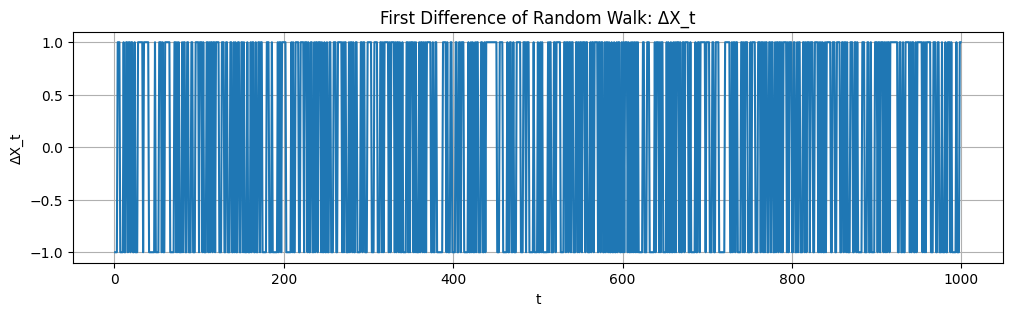

<Figure size 1200x300 with 0 Axes>

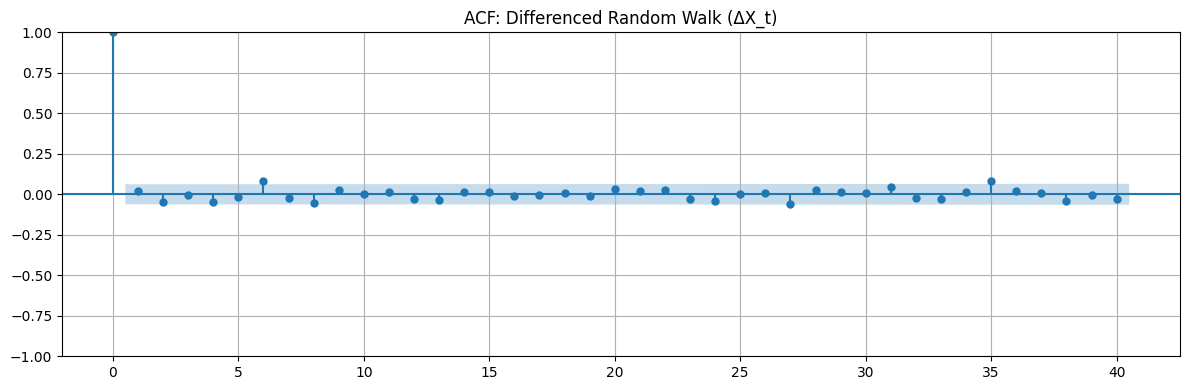


ADF TEST RESULTS SUMMARY (α = 0.05)
+--------------------------------+-----------------+-----------+--------+---------+------------------------+
| Series                         |   ADF Statistic |   P-Value |   Lags |   N Obs | Conclusion             |
+================================+=================+===========+========+=========+========================+
| Differenced Random Walk (ΔX_t) |        -30.9821 |    0.0000 |      0 |     998 | Reject H0 - Stationary |
+--------------------------------+-----------------+-----------+--------+---------+------------------------+

H0: Series has unit root (non-stationary) | H1: Series is stationary


KPSS TEST RESULTS SUMMARY (α = 0.05)
+--------------------------------+------------------+-----------+--------+--------------------------------+
| Series                         |   KPSS Statistic |   P-Value |   Lags | Conclusion                     |
+================================+==================+===========+========+===================

/tmp/ipython-input-4234137206.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_clean, regression=regression, nlags=nlags)


In [ ]:
rw_df["diff_rw"] = rw_df["random_walk"].diff()

# Plot differenced series
plt.figure(figsize=(12,3))
plt.plot(rw_df["diff_rw"])
plt.title("First Difference of Random Walk: ΔX_t")
plt.xlabel("t")
plt.ylabel("ΔX_t")
plt.grid(True)
plt.show()

# ACF of differenced series
plt.figure(figsize=(12,3))
plot_acf(rw_df["diff_rw"].dropna(), lags=40)
plt.title("ACF: Differenced Random Walk (ΔX_t)")
plt.tight_layout()
plt.show()

# Run tests on differenced series
adf_results_diff = [perform_adf_test(rw_df["diff_rw"].dropna(), "Differenced Random Walk (ΔX_t)")]
print_adf_summary(adf_results_diff)

kpss_results_diff = [perform_kpss_test(rw_df["diff_rw"].dropna(), "Differenced Random Walk (ΔX_t)", regression='c')]
print_kpss_summary(kpss_results_diff)


After taking the first difference, the series becomes the innovation sequence itself. The differenced series fluctuates around zero and shows no trend.

The ACF of the differenced series is close to zero at all lags except lag zero. This indicates that the differenced series has no persistence and behaves like white noise.

Differencing removes the unit root and the stochastic trend from the random walk. What remains is a stationary process with constant mean and variance. This is why the autocorrelation pattern changes from slow decay in levels to near zero in differences.